<a href="https://colab.research.google.com/github/Soumi-Das02/FSP/blob/main/CarPrice_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Develop and evaluate a regression model to predict the price of cars using various attributes from the CarPrice_Assignment.csv dataset.

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/FSP classes/data/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [61]:
df.columns.get_loc("enginesize")

16

In [62]:
df.columns.get_loc("horsepower")

21

In [63]:
df.columns.get_loc("carbody")

6

In [64]:
df.columns.get_loc("fueltype")

3

In [65]:
df.columns.get_loc("price")

25

In [66]:
x=df.iloc[:,2:25].values
x

array([['alfa-romero giulia', 'gas', 'std', ..., 5000, 21, 27],
       ['alfa-romero stelvio', 'gas', 'std', ..., 5000, 21, 27],
       ['alfa-romero Quadrifoglio', 'gas', 'std', ..., 5000, 19, 26],
       ...,
       ['volvo 244dl', 'gas', 'std', ..., 5500, 18, 23],
       ['volvo 246', 'diesel', 'turbo', ..., 4800, 26, 27],
       ['volvo 264gl', 'gas', 'turbo', ..., 5400, 19, 25]], dtype=object)

In [67]:
price=df.iloc[:,25].values
price

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

In [68]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

y= pd.qcut(price, q=3, labels=['low', 'medium', 'high'])
y_en= LabelEncoder()
y = y_en.fit_transform(y)
y

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [69]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
indexes = [0, 1, 2, 3, 4, 5, 6, 12, 13, 15]
for column in indexes:
    x[:,column]=en.fit_transform(x[:,column])
x

array([[2, 1, 0, ..., 5000, 21, 27],
       [3, 1, 0, ..., 5000, 21, 27],
       [1, 1, 0, ..., 5000, 19, 26],
       ...,
       [140, 1, 0, ..., 5500, 18, 23],
       [142, 0, 1, ..., 4800, 26, 27],
       [143, 1, 1, ..., 5400, 19, 25]], dtype=object)

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.83822103,  0.32879797, -0.46929532, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-1.81377978,  0.32879797, -0.46929532, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-1.86266229,  0.32879797, -0.46929532, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [ 1.53467254,  0.32879797, -0.46929532, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [ 1.58355505, -3.04138127,  2.13085442, ..., -0.68328649,
         0.11959362, -0.54605874],
       [ 1.60799631,  0.32879797,  2.13085442, ...,  0.57769233,
        -0.95301169, -0.83719538]])

In [71]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=1)
x_train

array([[ 0.31260965,  0.32879797,  2.13085442, ..., -0.26296022,
        -0.95301169, -0.98276371],
       [ 1.24137744,  0.32879797, -0.46929532, ...,  0.15736606,
        -0.95301169, -0.98276371],
       [ 0.97252361,  0.32879797, -0.46929532, ..., -0.68328649,
         0.27282295,  0.18178288],
       ...,
       [-1.32495462,  0.32879797, -0.46929532, ..., -0.78836806,
        -1.41269968, -1.85617365],
       [ 0.72811103,  0.32879797, -0.46929532, ..., -1.52393903,
         0.11959362,  0.03621456],
       [-1.00721827,  0.32879797, -0.46929532, ...,  1.41834487,
         0.27282295,  0.32735121]])

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [73]:
y_pred=knn_classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1,
       0, 2, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1,
       2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2])

In [74]:
y_test

array([1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2,
       1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2])

array([[15,  0,  2],
       [ 0, 17,  5],
       [ 4,  6, 13]])

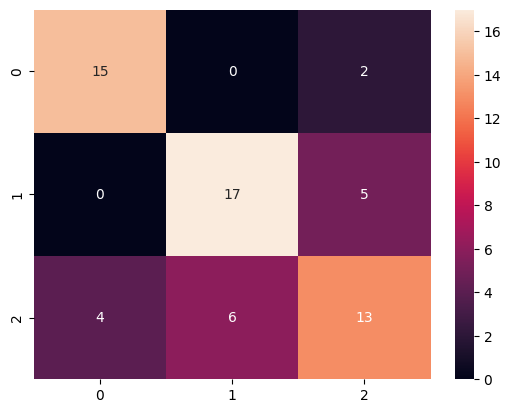

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
cm

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred, average='weighted', zero_division=0))
print("Recall:",recall_score(y_test,y_pred, average='weighted', zero_division=0))

Accuracy: 0.7258064516129032
Precision: 0.7198697128515539
Recall: 0.7258064516129032
